Model Parameters are: 

	 Queue length:			2 
 	 Pipeline length: 		10
	 Amount GtP:			2 
 	 Types of order carriers: 	2
	 To process orders:		150/200 
 	 Termination condition: 	3



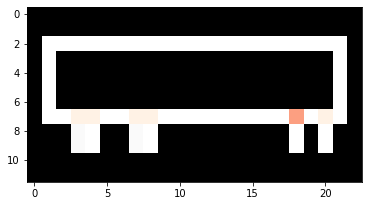

In [8]:
from rl.environments.AbstractConveyor import AbstractConveyor
import yaml
from stable_baselines import PPO2
from stable_baselines.common.vec_env import DummyVecEnv
import matplotlib.pyplot as plt
import rl.helpers
import cv2
import math
import random
import statistics as sts
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import pandas as pd
from os.path import join
import json


config_path = 'rl/config/AbstractConveyor.yml'
with open(config_path, 'r') as f:
    config = yaml.safe_load(f)
env = AbstractConveyor(config)

print('Model Parameters are: \n')
print('\t Queue length:\t\t\t{} \n \t Pipeline length: \t\t{}'.format(env.gtp_buffer_length, env.pipeline_length))
print('\t Amount GtP:\t\t\t{} \n \t Types of order carriers: \t{}'.format(env.amount_of_gtps, env.amount_of_outputs))
print('\t To process orders:\t\t{}/{} \n \t Termination condition: \t{}\n'.format(env.max_items_processed, env.amount_of_gtps*env.gtp_demand_size, env.termination_condition))
env.render_plt()

In [6]:
configurations = [
    [1,2],
    [2,2],
    [2,3],
    [3,3],
    [4,3],
    [5,3],
]

In [7]:
init_states = {}
for configuration in configurations:
    no_gtp, output= configuration
    print('building starting state for {}x{} design'.format(no_gtp, output))
    config['environment']['amount_of_gtps'] = no_gtp
    config['environment']['amount_of_outputs'] = output
    
    env = AbstractConveyor(config)
    env.reset()

    init_states['{}x{}'.format(no_gtp, output)] = {}
    for i in range(5001):
        env.reset()
        init_states['{}x{}'.format(no_gtp, output)][i] = {}
        init_states['{}x{}'.format(no_gtp, output)][i]['items_on_conv'] = env.items_on_conv
        init_states['{}x{}'.format(no_gtp, output)][i]['in_queue'] = env.in_queue
        init_states['{}x{}'.format(no_gtp, output)][i]['in_pipe'] = env.in_pipe
        init_states['{}x{}'.format(no_gtp, output)][i]['W_times'] = env.W_times

with open(join('rl', 'helpers', 'start_states.json'), 'w') as f:
    f.write(json.dumps(init_states))
    f.close()

In [9]:
#for adjustable buffer size
configurations = [1,2,3,4,5,6,7,8,9,10]
init_states = {}
init_states['2x2'] = {}
for configuration in configurations:
    print('building starting state for 2x2 design, buffer size{}'.format(configuration))
    config['environment']['gtp_buffer_length'] = configuration

    
    env = AbstractConveyor(config)
    env.reset()

    init_states['2x2']['buffer{}'.format(configuration)] = {}
    for i in range(5001):
        env.reset()
        init_states['2x2']['buffer{}'.format(configuration)][i] = {}
        init_states['2x2']['buffer{}'.format(configuration)][i]['items_on_conv'] = env.items_on_conv
        init_states['2x2']['buffer{}'.format(configuration)][i]['in_queue'] = env.in_queue
        init_states['2x2']['buffer{}'.format(configuration)][i]['in_pipe'] = env.in_pipe
        init_states['2x2']['buffer{}'.format(configuration)][i]['W_times'] = env.W_times

with open(join('rl', 'helpers', 'start_states_adj_buffer.json'), 'w') as f:
    f.write(json.dumps(init_states))
    f.close()

building starting state for 2x2 design, buffer size1
building starting state for 2x2 design, buffer size2
building starting state for 2x2 design, buffer size3
building starting state for 2x2 design, buffer size4
building starting state for 2x2 design, buffer size5
building starting state for 2x2 design, buffer size6
building starting state for 2x2 design, buffer size7
building starting state for 2x2 design, buffer size8
building starting state for 2x2 design, buffer size9
building starting state for 2x2 design, buffer size10
